# Question
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [4]:
!pip install tensorflow

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
# importing dataset

data=pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Performing EDA & Visualization on dataset

In [9]:
# Geting Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [10]:
# Descriptive Satistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [11]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
data1=data.copy()
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [13]:
data1[data1.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [14]:
data1["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [15]:
data1["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [16]:
from sklearn import preprocessing


In [17]:
# Checking Correlation between numerical function
data1=data[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [18]:
cor=data1.corr()
cor

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


<AxesSubplot:>

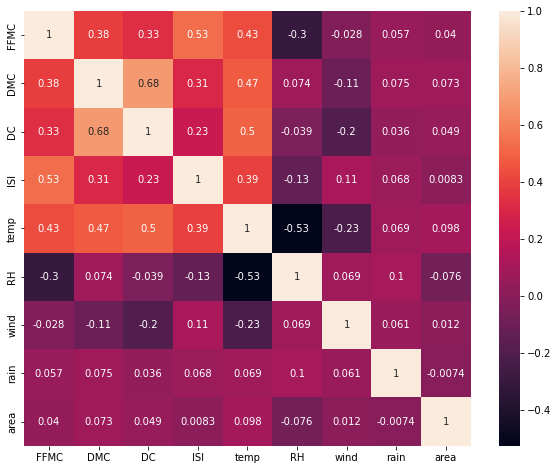

In [19]:
# creating heatmap by use of correlation

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

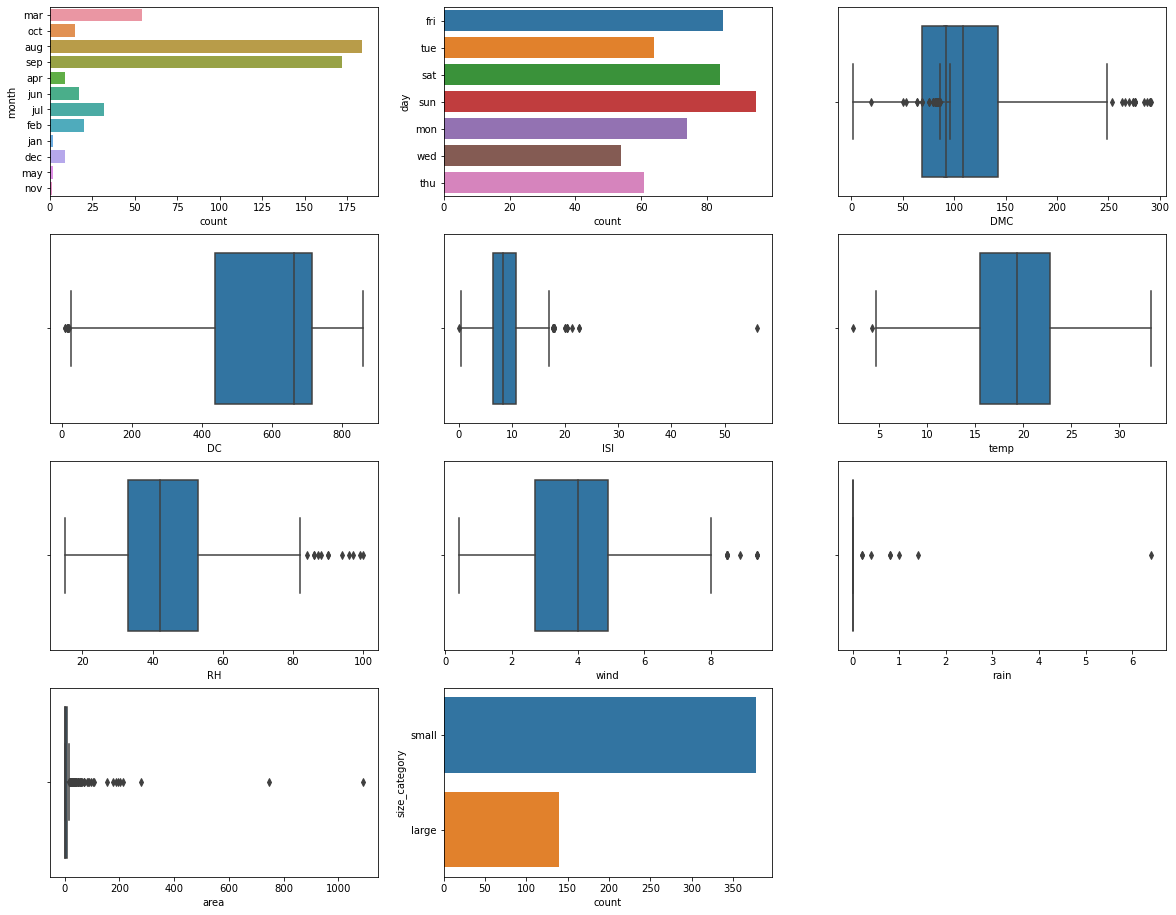

In [20]:
# Ploting Count plot
plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data=data1, y='month')];

[plt.subplot(4,3,2), sns.countplot(data=data1, y='day')];

[plt.subplot(4,3,3), sns.boxplot(x=data1["FFMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=data1["DMC"])];

[plt.subplot(4,3,4), sns.boxplot(x=data1["DC"])];

[plt.subplot(4,3,5), sns.boxplot(x=data1["ISI"])];

[plt.subplot(4,3,6), sns.boxplot(x=data1["temp"])];

[plt.subplot(4,3,7), sns.boxplot(x=data1["RH"])];

[plt.subplot(4,3,8), sns.boxplot(x=data1["wind"])];

[plt.subplot(4,3,9), sns.boxplot(x=data1["rain"])];

[plt.subplot(4,3,10), sns.boxplot(x=data1["area"])]

[plt.subplot(4,3,11), sns.countplot(data=data1, y='size_category')];

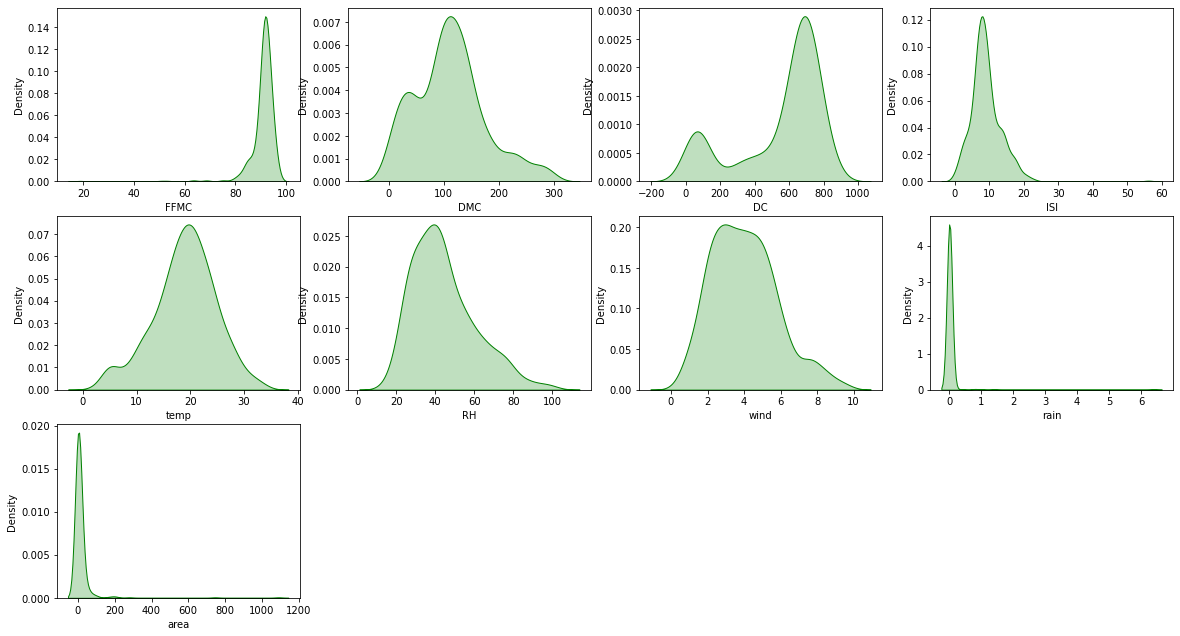

In [21]:
no_columns = data1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data1[column],color='g',shade=True)

Text(0, 0.5, 'Rate')

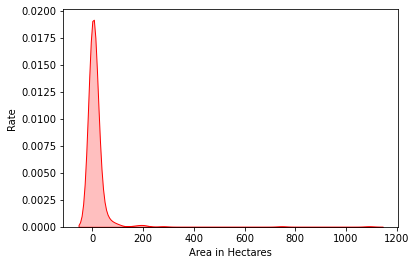

In [22]:
sns.kdeplot(data1['area'],shade=True,color='r')
plt.xlabel('Area in Hectares')
plt.ylabel('Rate')

# Histogram And Boxplot

([<AxesSubplot:title={'center':'v'}>,
  <AxesSubplot:title={'center':'v'}>,
  Text(0.5, 1.0, 'v')],
 [<AxesSubplot:xlabel='FFMC'>, <AxesSubplot:xlabel='FFMC'>])

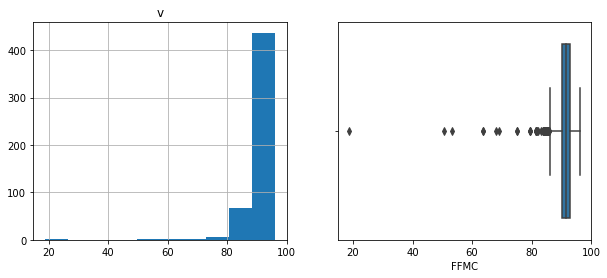

In [23]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['FFMC'].hist(),plt.title("v")],[plt.subplot(1,2,2),sns.boxplot(x=data1["FFMC"])]


([<AxesSubplot:title={'center':'DMC'}>,
  <AxesSubplot:title={'center':'DMC'}>,
  Text(0.5, 1.0, 'DMC')],
 [<AxesSubplot:xlabel='DMC'>, <AxesSubplot:xlabel='DMC'>])

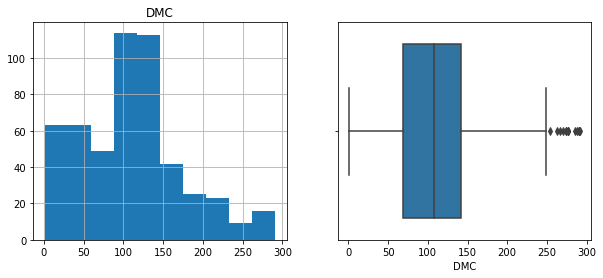

In [24]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['DMC'].hist(),plt.title("DMC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DMC"])]


([<AxesSubplot:title={'center':'DC'}>,
  <AxesSubplot:title={'center':'DC'}>,
  Text(0.5, 1.0, 'DC')],
 [<AxesSubplot:xlabel='DC'>, <AxesSubplot:xlabel='DC'>])

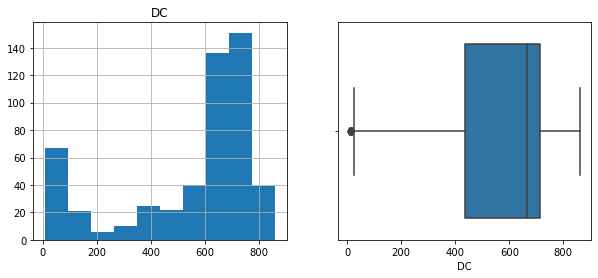

In [25]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['DC'].hist(),plt.title("DC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DC"])]


([<AxesSubplot:title={'center':'ISI'}>,
  <AxesSubplot:title={'center':'ISI'}>,
  Text(0.5, 1.0, 'ISI')],
 [<AxesSubplot:xlabel='ISI'>, <AxesSubplot:xlabel='ISI'>])

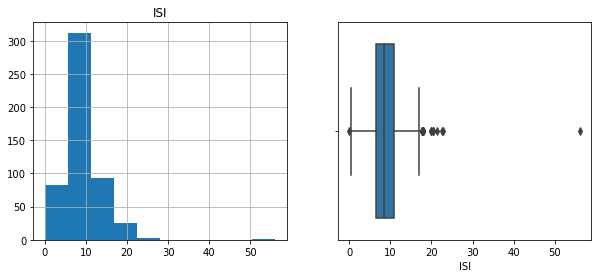

In [26]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['ISI'].hist(),plt.title("ISI")],[plt.subplot(1,2,2),sns.boxplot(x=data1["ISI"])]


([<AxesSubplot:title={'center':'temp'}>,
  <AxesSubplot:title={'center':'temp'}>,
  Text(0.5, 1.0, 'temp')],
 [<AxesSubplot:xlabel='temp'>, <AxesSubplot:xlabel='temp'>])

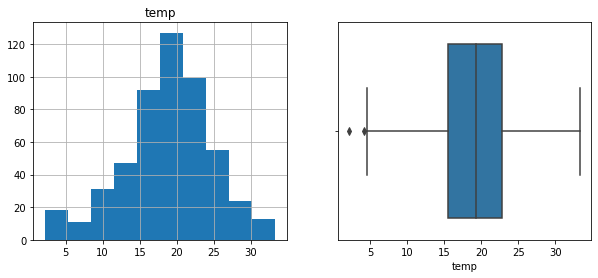

In [27]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['temp'].hist(),plt.title("temp")],[plt.subplot(1,2,2),sns.boxplot(x=data1["temp"])]


([<AxesSubplot:title={'center':'RH'}>,
  <AxesSubplot:title={'center':'RH'}>,
  Text(0.5, 1.0, 'RH')],
 [<AxesSubplot:xlabel='RH'>, <AxesSubplot:xlabel='RH'>])

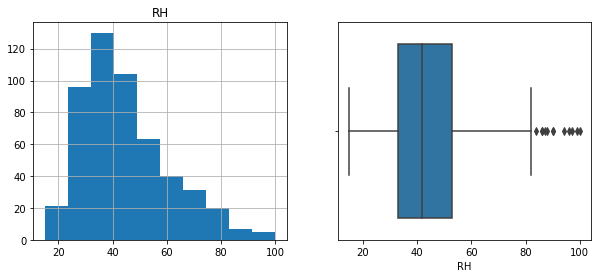

In [28]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['RH'].hist(),plt.title("RH")],[plt.subplot(1,2,2),sns.boxplot(x=data1["RH"])]


([<AxesSubplot:title={'center':'wind'}>,
  <AxesSubplot:title={'center':'wind'}>,
  Text(0.5, 1.0, 'wind')],
 [<AxesSubplot:xlabel='wind'>, <AxesSubplot:xlabel='wind'>])

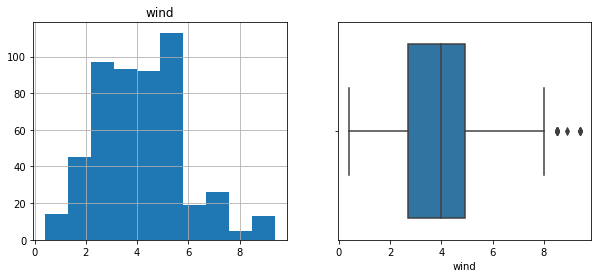

In [29]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['wind'].hist(),plt.title("wind")],[plt.subplot(1,2,2),sns.boxplot(x=data1["wind"])]


([<AxesSubplot:title={'center':'rain'}>,
  <AxesSubplot:title={'center':'rain'}>,
  Text(0.5, 1.0, 'rain')],
 [<AxesSubplot:xlabel='rain'>, <AxesSubplot:xlabel='rain'>])

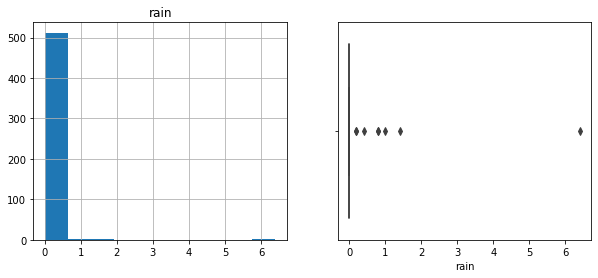

In [30]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['rain'].hist(),plt.title("rain")],[plt.subplot(1,2,2),sns.boxplot(x=data1["rain"])]


([<AxesSubplot:title={'center':'area'}>,
  <AxesSubplot:title={'center':'area'}>,
  Text(0.5, 1.0, 'area')],
 [<AxesSubplot:xlabel='area'>, <AxesSubplot:xlabel='area'>])

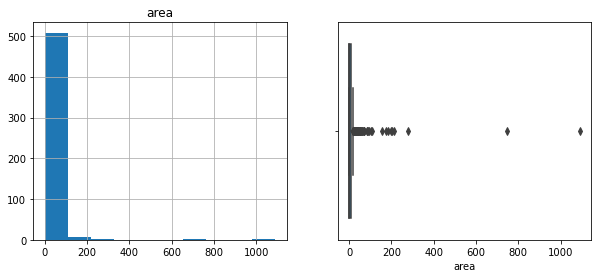

In [31]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['area'].hist(),plt.title("area")],[plt.subplot(1,2,2),sns.boxplot(x=data1["area"])]


In [32]:
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])


In [33]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [34]:
x = data.iloc[:,2:11]
y = data['size_category']

In [35]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [37]:
# fix random seed for reproducibility
seed = 9
np.random.seed(seed)

In [38]:
# creating model with ["relu" and "sigmoid"]

model = Sequential() # 0 level
model.add(Dense(12, input_dim=9,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [39]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model


In [40]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 3s 26ms/step - loss: 0.7085 - accuracy: 0.7486 - val_loss: 1.0443 - val_accuracy: 0.7076
Epoch 2/250
35/35 [==============================] - 0s 7ms/step - loss: 0.6401 - accuracy: 0.7514 - val_loss: 1.0665 - val_accuracy: 0.7018
Epoch 3/250
35/35 [==============================] - 0s 9ms/step - loss: 0.5680 - accuracy: 0.7688 - val_loss: 0.8391 - val_accuracy: 0.7076
Epoch 4/250
35/35 [==============================] - 0s 10ms/step - loss: 0.4812 - accuracy: 0.8121 - val_loss: 0.6301 - val_accuracy: 0.7544
Epoch 5/250
35/35 [==============================] - 0s 7ms/step - loss: 0.4422 - accuracy: 0.8237 - val_loss: 0.5248 - val_accuracy: 0.8129
Epoch 6/250
35/35 [==============================] - 0s 7ms/step - loss: 0.4238 - accuracy: 0.8208 - val_loss: 0.5159 - val_accuracy: 0.8012
Epoch 7/250
35/35 [==============================] - 0s 9ms/step - loss: 0.4273 - accuracy: 0.8266 - val_loss: 0.5435 - val_accuracy: 0.7778
Epoch 8/250

In [41]:
# Evaluating the Model

score = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9555
accuracy: 95.55%


In [42]:
model.metrics_names, score 

(['loss', 'accuracy'], [0.13979215919971466, 0.9555125832557678])

In [43]:
# Visualzation of Training History

fil_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

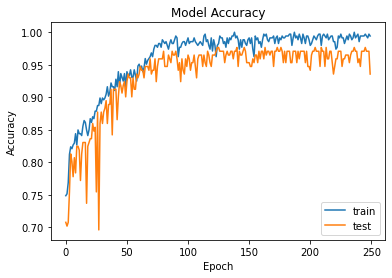

In [48]:
# # summarizaion of history for accuracy

plt.plot(fil_model.history['accuracy'])
plt.plot(fil_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


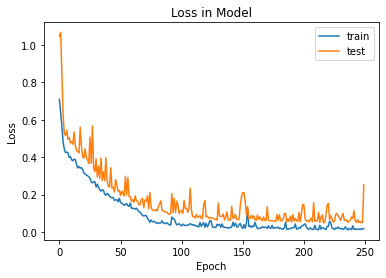

In [49]:
# # summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [50]:
predictions = model.predict(x)

17/17 [==============================] - 0s 2ms/step


# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [51]:
# fix random seed for reproducibility
seed2 = 9
np.random.seed(seed2)

In [52]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear')) #1st layer
model2.add(Dense(9,  activation='linear')) #2nd layer
model2.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [53]:
# Compile model
# chaging optimizer older=ada, new=adadelta

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model2


In [54]:
# Fit the model
# Change ephocs from 250 to 200

fil_model2=model2.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)


Epoch 1/200
35/35 [==============================] - 2s 18ms/step - loss: 30.5308 - accuracy: 0.2399 - val_loss: 41.4775 - val_accuracy: 0.3041
Epoch 2/200
35/35 [==============================] - 0s 5ms/step - loss: 30.1717 - accuracy: 0.2399 - val_loss: 41.1209 - val_accuracy: 0.3041
Epoch 3/200
35/35 [==============================] - 0s 5ms/step - loss: 29.8042 - accuracy: 0.2399 - val_loss: 40.7563 - val_accuracy: 0.3041
Epoch 4/200
35/35 [==============================] - 0s 5ms/step - loss: 29.4280 - accuracy: 0.2399 - val_loss: 40.3851 - val_accuracy: 0.3041
Epoch 5/200
35/35 [==============================] - 0s 7ms/step - loss: 29.0440 - accuracy: 0.2399 - val_loss: 40.0022 - val_accuracy: 0.3041
Epoch 6/200
35/35 [==============================] - 0s 9ms/step - loss: 28.6498 - accuracy: 0.2399 - val_loss: 39.6140 - val_accuracy: 0.3041
Epoch 7/200
35/35 [==============================] - 0s 10ms/step - loss: 28.2500 - accuracy: 0.2341 - val_loss: 39.2217 - val_accuracy: 0.30

In [55]:
# Evaluating the Model

score2 = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))


17/17 [==============================] - 0s 3ms/step - loss: 7.8751 - accuracy: 0.5164
accuracy: 51.64%


In [56]:
# Visualzation of Training History, metric name and score

model2.metrics_names, score2 , fil_model2.history.keys()



(['loss', 'accuracy'],
 [7.875060081481934, 0.5164409875869751],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

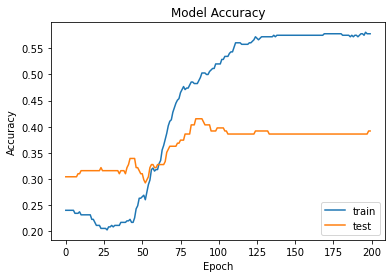

In [57]:
# # summarizaion of history for accuracy

plt.plot(fil_model2.history['accuracy'])
plt.plot(fil_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

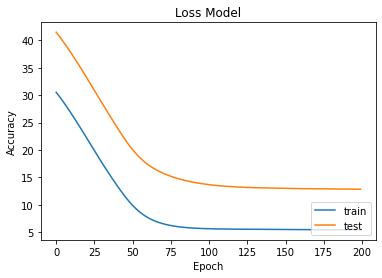

In [58]:
# # summarizaion of history for loss

plt.plot(fil_model2.history['loss'])
plt.plot(fil_model2.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [59]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [60]:
# creating model with ["sigmoid" and "logistic"]

model3 = Sequential() # 0 level
model3.add(Dense(14, input_dim=9,  activation='relu')) # FIRST LAYER
model3.add(Dense(9,  activation='sigmoid')) #2nd layer
model3.add(Dense(1, activation='tanh')) #3rd layer or op layer


In [61]:
 #Compile model
# chaging optimizer older=adadelta/ada, new=adagrad

model3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])


In [62]:
# Fit the model
# Change ephocs

fil_model3=model3.fit(x, y, validation_split=0.33, epochs=300, batch_size=15)


Epoch 1/300
24/24 [==============================] - 2s 30ms/step - loss: 0.5615 - accuracy: 0.7572 - val_loss: 0.7451 - val_accuracy: 0.6608
Epoch 2/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5317 - accuracy: 0.7572 - val_loss: 0.7323 - val_accuracy: 0.6608
Epoch 3/300
24/24 [==============================] - 0s 8ms/step - loss: 0.5254 - accuracy: 0.7572 - val_loss: 0.7282 - val_accuracy: 0.6608
Epoch 4/300
24/24 [==============================] - 0s 9ms/step - loss: 0.5228 - accuracy: 0.7572 - val_loss: 0.7177 - val_accuracy: 0.6608
Epoch 5/300
24/24 [==============================] - 0s 13ms/step - loss: 0.5220 - accuracy: 0.7572 - val_loss: 0.7219 - val_accuracy: 0.6608
Epoch 6/300
24/24 [==============================] - 0s 11ms/step - loss: 0.5210 - accuracy: 0.7572 - val_loss: 0.7225 - val_accuracy: 0.6608
Epoch 7/300
24/24 [==============================] - 0s 15ms/step - loss: 0.5202 - accuracy: 0.7572 - val_loss: 0.7232 - val_accuracy: 0.6608
Epoch 8/3

In [63]:
# Evaluating the Model

score3 = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))


17/17 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.7311
accuracy: 73.11%


In [64]:
# Visualzation of Training History, metric name and score

model3.metrics_names, score3 , fil_model3.history.keys()

(['loss', 'accuracy'],
 [0.5207687616348267, 0.731141209602356],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

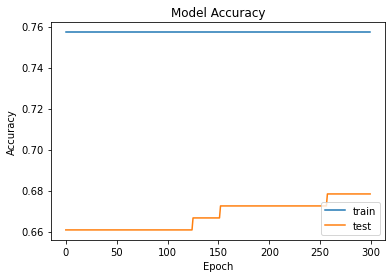

In [65]:
# # summarizaion of history for accuracy

plt.plot(fil_model3.history['accuracy'])
plt.plot(fil_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

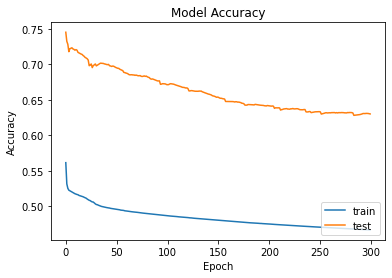

In [66]:
# # summarizaion of history for loss

plt.plot(fil_model3.history['loss'])
plt.plot(fil_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

AS per calcluation "relu" activation function helping to uncrease accuracy